In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'1.0.1'

# Create a dataFrame

## Create a dataframe from a list

In [3]:
pd.DataFrame([i for i in range(5)])

,0
0,0
1,1
2,2
3,3
4,4


In [4]:
pd.DataFrame([[i for i in range(5)],[i for i in range(5,10)],[i for i in range(10,15)]])

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [5]:
pd.DataFrame([['Alex',10,'male'],['Bob',12,'male'],['Clarke',13,'male']], columns=['name','age','sex'],index=[i for i in range(15,18)])

,name,age,sex
15,Alex,10,male
16,Bob,12,male
17,Clarke,13,male


## Create a dataframe from a dictionary

In [6]:
dic = {'name':['alex','bob','clarke','tania','shomaila'],
      'age':[12,13,19,24,29],
      'sex':['male','male','male','female','female']}

In [7]:
pd.DataFrame(dic, index=['rank1','rank2','rank3','rank4','rank5'])

,name,age,sex
rank1,alex,12,male
rank2,bob,13,male
rank3,clarke,19,male
rank4,tania,24,female
rank5,shomaila,29,female


the keys of dictionary will appear as column name

## Create a dataframe from a list of dictionaries

In this case the common entries will appear as indexes

In [8]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,'Florida': 170312, 'Illinois': 149995}
population_dict = {'California': 38332521,'Texas': 26448193,'New York': 19651127,'Florida': 19552860,'Illinois': 12882135}
pd.DataFrame({'population':population_dict, 'area':area_dict})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [9]:
dic1 = {'name':['alex','bob','clarke','tania','shomaila'],
      'age':[12,13,19,24,29],
      'sex':['male','male','male','female','female']}
dic2 = {'name':['alex','tom','micky','cersie','shae'],
      'age':[12,13,19,24,29],
      'sex':['male','male','male','female','female']}
data = {'dic1':dic1,'dic2':dic2}
pd.DataFrame(data)

,dic1,dic2
name,"[alex, bob, clarke, tania, shomaila]","[alex, tom, micky, cersie, shae]"
age,"[12, 13, 19, 24, 29]","[12, 13, 19, 24, 29]"
sex,"[male, male, male, female, female]","[male, male, male, female, female]"


In [10]:
data = [{'a':i,'b':i**2,'c':i**3,'d':i**4}
       for i in range(10)]
pd.DataFrame(data)

,a,b,c,d
0,0,0,0,0
1,1,1,1,1
2,2,4,8,16
3,3,9,27,81
4,4,16,64,256
5,5,25,125,625
6,6,36,216,1296
7,7,49,343,2401
8,8,64,512,4096
9,9,81,729,6561


In [11]:
index = [('California', 2000), ('California', 2010),('New York', 2000), ('New York', 2010),('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,18976457, 19378102,20851820, 25145561]

In [12]:
index

[('California', 2000),
 ('California', 2010),
 ('New York', 2000),
 ('New York', 2010),
 ('Texas', 2000),
 ('Texas', 2010)]

In [13]:
populations

[33871648, 37253956, 18976457, 19378102, 20851820, 25145561]

In [14]:
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [15]:
new = pd.MultiIndex.from_tuples(index)
new

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [16]:
pop.reindex(new)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

# Combining data sets

In [17]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]for c in cols}
    return pd.DataFrame(data, ind)

In [18]:
df1 = make_df(['a', 'b','c'], range(3));df1

,a,b,c
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2


In [19]:
df2 = make_df(['d', 'b','c'], range(3));df2

,d,b,c
0,d0,b0,c0
1,d1,b1,c1
2,d2,b2,c2


## concating  

In [20]:
pd.concat([df1,df2])

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
0,NaN,b0,c0,d0
1,NaN,b1,c1,d1
2,NaN,b2,c2,d2


In [21]:
df2 = make_df(['a', 'b','c'], range(4,7));df2

,a,b,c
4,a4,b4,c4
5,a5,b5,c5
6,a6,b6,c6


In [22]:
pd.concat([df1,df2])

,a,b,c
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2
4,a4,b4,c4
5,a5,b5,c5
6,a6,b6,c6


In [23]:
pd.concat([df1,df2], axis=1)

,a,b,c,a,b,c
0,a0,b0,c0,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN
2,a2,b2,c2,NaN,NaN,NaN
4,NaN,NaN,NaN,a4,b4,c4
5,NaN,NaN,NaN,a5,b5,c5
6,NaN,NaN,NaN,a6,b6,c6


In [24]:
df2 = make_df(['a', 'b','c'], range(4,7));df2.set_index=[100,200,300];df2

,a,b,c
4,a4,b4,c4
5,a5,b5,c5
6,a6,b6,c6


In [25]:
# by default the dataframes are concatinated according to axis=0 and by index values
pd.concat([df1,df2], axis=1)

,a,b,c,a,b,c
0,a0,b0,c0,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN
2,a2,b2,c2,NaN,NaN,NaN
4,NaN,NaN,NaN,a4,b4,c4
5,NaN,NaN,NaN,a5,b5,c5
6,NaN,NaN,NaN,a6,b6,c6


In [26]:
pd.concat([df1,df2], axis=1)

,a,b,c,a,b,c
0,a0,b0,c0,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN
2,a2,b2,c2,NaN,NaN,NaN
4,NaN,NaN,NaN,a4,b4,c4
5,NaN,NaN,NaN,a5,b5,c5
6,NaN,NaN,NaN,a6,b6,c6


In [27]:
x = make_df(['a','b'], range(1,4)); y = make_df(['a','b'], range(7,10));print(x);print('\n',y); pd.concat([x,y], ignore_index=True)

    a   b
1  a1  b1
2  a2  b2
3  a3  b3

     a   b
7  a7  b7
8  a8  b8
9  a9  b9


,a,b
0,a1,b1
1,a2,b2
2,a3,b3
3,a7,b7
4,a8,b8
5,a9,b9


In [28]:
x = make_df(['a','b'], range(1,4)); y = make_df(['c','d'], range(7,10));print(x);print('\n',y); pd.concat([x,y], ignore_index=True)

    a   b
1  a1  b1
2  a2  b2
3  a3  b3

     c   d
7  c7  d7
8  c8  d8
9  c9  d9


,a,b,c,d
0,a1,b1,NaN,NaN
1,a2,b2,NaN,NaN
2,a3,b3,NaN,NaN
3,NaN,NaN,c7,d7
4,NaN,NaN,c8,d8
5,NaN,NaN,c9,d9


In [29]:
x = make_df(['a','b','c'], range(1,4)); y = make_df(['a','b','d'], range(7,10));print(x);print('\n',y); pd.concat([x,y], ignore_index=True, join='inner')

    a   b   c
1  a1  b1  c1
2  a2  b2  c2
3  a3  b3  c3

     a   b   d
7  a7  b7  d7
8  a8  b8  d8
9  a9  b9  d9


,a,b
0,a1,b1
1,a2,b2
2,a3,b3
3,a7,b7
4,a8,b8
5,a9,b9


## Merging data frames

In [30]:
x = make_df(['a','b','c'], range(1,4)); y = make_df(['a','d'], range(1,4))
print(x);print('\n',y);
print(pd.merge(x,y))
pd.concat([x,y])

    a   b   c
1  a1  b1  c1
2  a2  b2  c2
3  a3  b3  c3

     a   d
1  a1  d1
2  a2  d2
3  a3  d3
    a   b   c   d
0  a1  b1  c1  d1
1  a2  b2  c2  d2
2  a3  b3  c3  d3


,a,b,c,d
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
1,a1,NaN,NaN,d1
2,a2,NaN,NaN,d2
3,a3,NaN,NaN,d3


In [31]:
z=y
z['b']=['b3','b4','b5']

In [32]:
pd.merge(x,z)

,a,b,c,d


In [33]:
pd.merge(x,y,how='outer')

,a,b,c,d
0,a1,b1,c1,NaN
1,a2,b2,c2,NaN
2,a3,b3,c3,NaN
3,a1,b3,NaN,d1
4,a2,b4,NaN,d2
5,a3,b5,NaN,d3


In [34]:
pd.merge(x,y,on='a')

,a,b_x,c,d,b_y
0,a1,b1,c1,d1,b3
1,a2,b2,c2,d2,b4
2,a3,b3,c3,d3,b5


In [35]:
pd.merge(x,y,on='a',suffixes=('_L','_R'))

,a,b_L,c,d,b_R
0,a1,b1,c1,d1,b3
1,a2,b2,c2,d2,b4
2,a3,b3,c3,d3,b5


In [36]:
xa = x.set_index('a')
ya = y.set_index('a')
print(xa,'\n',ya)

     b   c
a         
a1  b1  c1
a2  b2  c2
a3  b3  c3 
      d   b
a         
a1  d1  b3
a2  d2  b4
a3  d3  b5


In [37]:
pd.merge(xa,ya)

,b,c,d
0,b3,c3,d1


In [38]:
pd.merge(xa,ya,left_index=True,right_index=True)

,b_x,c,d,b_y
a,,,,
a1,b1,c1,d1,b3
a2,b2,c2,d2,b4
a3,b3,c3,d3,b5


# Grouping & Aggregation

In [39]:
import seaborn as sns
data = sns.load_dataset("planets")
data = pd.DataFrame(data)
data

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [40]:
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [41]:
data.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [42]:
group = data.groupby('method')

In [43]:
group.describe()['number']
# group.describe()['mass']

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
Eclipse Timing Variations,9.0,1.666667,0.500000,1.0,1.0,2.0,2.00,2.0
Imaging,38.0,1.315789,0.933035,1.0,1.0,1.0,1.00,4.0
Microlensing,23.0,1.173913,0.387553,1.0,1.0,1.0,1.00,2.0
Orbital Brightness Modulation,3.0,1.666667,0.577350,1.0,1.5,2.0,2.00,2.0
Pulsar Timing,5.0,2.200000,1.095445,1.0,1.0,3.0,3.00,3.0
Pulsation Timing Variations,1.0,1.000000,NaN,1.0,1.0,1.0,1.00,1.0
Radial Velocity,553.0,1.721519,1.157141,1.0,1.0,1.0,2.00,6.0
Transit,397.0,1.954660,1.399119,1.0,1.0,1.0,2.00,7.0


In [44]:
group.sum()
# years have alos been added which does not make any sense

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,1.262360e+03,0.00000,35.75,4023
Eclipse Timing Variations,15,4.276480e+04,10.25000,1261.44,18090
Imaging,50,1.418973e+06,0.00000,2166.91,76347
Microlensing,27,2.207500e+04,0.00000,41440.00,46225
Orbital Brightness Modulation,5,2.127920e+00,0.00000,2360.00,6035
Pulsar Timing,11,3.671511e+04,0.00000,1200.00,9992
Pulsation Timing Variations,1,1.170000e+03,0.00000,0.00,2007
Radial Velocity,952,4.553151e+05,1341.65638,27348.11,1110158
Transit,776,8.377523e+03,1.47000,134242.77,798461


In [45]:
group['mass'].sum()

method
Astrometry                          0.00000
Eclipse Timing Variations          10.25000
Imaging                             0.00000
Microlensing                        0.00000
Orbital Brightness Modulation       0.00000
Pulsar Timing                       0.00000
Pulsation Timing Variations         0.00000
Radial Velocity                  1341.65638
Transit                             1.47000
Transit Timing Variations           0.00000
Name: mass, dtype: float64

In [46]:
group['mass'].mean()

method
Astrometry                            NaN
Eclipse Timing Variations        5.125000
Imaging                               NaN
Microlensing                          NaN
Orbital Brightness Modulation         NaN
Pulsar Timing                         NaN
Pulsation Timing Variations           NaN
Radial Velocity                  2.630699
Transit                          1.470000
Transit Timing Variations             NaN
Name: mass, dtype: float64

In [47]:
group.aggregate('max')
#giving us only the maximum of a specific group

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1,1016.000000,NaN,20.77,2013
Eclipse Timing Variations,2,10220.000000,6.05,500.00,2012
Imaging,4,730000.000000,NaN,165.00,2013
Microlensing,2,5100.000000,NaN,7720.00,2013
Orbital Brightness Modulation,2,1.544929,NaN,1180.00,2013
Pulsar Timing,3,36525.000000,NaN,1200.00,2011
Pulsation Timing Variations,1,1170.000000,NaN,NaN,2007
Radial Velocity,6,17337.500000,25.00,354.00,2014
Transit,7,331.600590,1.47,8500.00,2014


In [48]:
group.aggregate(np.max)

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1,1016.000000,NaN,20.77,2013
Eclipse Timing Variations,2,10220.000000,6.05,500.00,2012
Imaging,4,730000.000000,NaN,165.00,2013
Microlensing,2,5100.000000,NaN,7720.00,2013
Orbital Brightness Modulation,2,1.544929,NaN,1180.00,2013
Pulsar Timing,3,36525.000000,NaN,1200.00,2011
Pulsation Timing Variations,1,1170.000000,NaN,NaN,2007
Radial Velocity,6,17337.500000,25.00,354.00,2014
Transit,7,331.600590,1.47,8500.00,2014


In [49]:
group.aggregate(['min',np.max,'mean'])

number                orbital_period  \
                                 min amax      mean            min   
method                                                               
Astrometry                         1    1  1.000000     246.360000   
Eclipse Timing Variations          1    2  1.666667    1916.250000   
Imaging                            1    4  1.315789    4639.150000   
Microlensing                       1    2  1.173913    1825.000000   
Orbital Brightness Modulation      1    2  1.666667       0.240104   
Pulsar Timing                      1    3  2.200000       0.090706   
Pulsation Timing Variations        1    1  1.000000    1170.000000   
Radial Velocity                    1    6  1.721519       0.736540   
Transit                            1    7  1.954660       0.355000   
Transit Timing Variations          2    3  2.250000      22.339500   

                                                               mass         \
                                        amax           mean     min   amax   
method                                                                       
Astrometry                       1016.000000     631.180000     NaN    NaN   
Eclipse Timing Variations       10220.000000    4751.644444  4.2000   6.05   
Imaging                        730000.000000  118247.737500     NaN    NaN   
Microlensing                     5100.000000    3153.571429     NaN    NaN   
Orbital Brightness Modulation       1.544929       0.709307     NaN    NaN   
Pulsar Timing                   36525.000000    7343.021201     NaN    NaN   
Pulsation Timing Variations      1170.000000    1170.000000     NaN    NaN   
Radial Velocity                 17337.500000     823.354680  0.0036  25.00   
Transit                           331.600590      21.102073  1.4700   1.47   
Transit Timing Variations         160.000000      79.783500     NaN    NaN   

                                        distance                        year  \
                                   mean      min     amax         mean   min   
method                                                                         
Astrometry                          NaN    14.98    20.77    17.875000  2010   
Eclipse Timing Variations      5.125000   130.72   500.00   315.360000  2008   
Imaging                             NaN     7.69   165.00    67.715937  2004   
Microlensing                        NaN  1760.00  7720.00  4144.000000  2004   
Orbital Brightness Modulation       NaN  1180.00  1180.00  1180.000000  2011   
Pulsar Timing                       NaN  1200.00  1200.00  1200.000000  1992   
Pulsation Timing Variations         NaN      NaN      NaN          NaN  2007   
Radial Velocity                2.630699     1.35   354.00    51.600208  1989   
Transit                        1.470000    38.00  8500.00   599.298080  2002   
Transit Timing Variations           NaN   339.00  2119.00  1104.333333  2011   

                                                  
                               amax         mean  
method                                            
Astrometry                     2013  2011.500000  
Eclipse Timing Variations      2012  2010.000000  
Imaging                        2013  2009.131579  
Microlensing                   2013  2009.782609  
Orbital Brightness Modulation  2013  2011.666667  
Pulsar Timing                  2011  1998.400000  
Pulsation Timing Variations    2007  2007.000000  
Radial Velocity                2014  2007.518987  
Transit                        2014  2011.236776  
Transit Timing Variations      2014  2012.500000

In [50]:
group.mean()[group.mean()['orbital_period']>1000]
# gives us only those group informations which have average orbital period greater than 1000

,number,orbital_period,mass,distance,year
method,,,,,
Eclipse Timing Variations,1.666667,4751.644444,5.125,315.360000,2010.000000
Imaging,1.315789,118247.737500,NaN,67.715937,2009.131579
Microlensing,1.173913,3153.571429,NaN,4144.000000,2009.782609
Pulsar Timing,2.200000,7343.021201,NaN,1200.000000,1998.400000
Pulsation Timing Variations,1.000000,1170.000000,NaN,NaN,2007.000000


In [51]:
group.apply(lambda x: x.mean())
# similar to group.mean()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.000000,631.180000,NaN,17.875000,2011.500000
Eclipse Timing Variations,1.666667,4751.644444,5.125000,315.360000,2010.000000
Imaging,1.315789,118247.737500,NaN,67.715937,2009.131579
Microlensing,1.173913,3153.571429,NaN,4144.000000,2009.782609
Orbital Brightness Modulation,1.666667,0.709307,NaN,1180.000000,2011.666667
Pulsar Timing,2.200000,7343.021201,NaN,1200.000000,1998.400000
Pulsation Timing Variations,1.000000,1170.000000,NaN,NaN,2007.000000
Radial Velocity,1.721519,823.354680,2.630699,51.600208,2007.518987
Transit,1.954660,21.102073,1.470000,599.298080,2011.236776


In [52]:
data['decade'] = 10 * (data['year']//10)

In [53]:
decade_grp = data.groupby('decade')
decade_grp.mean()

,number,orbital_period,mass,distance,year
decade,,,,,
1980,1.000000,83.888000,11.680000,40.570000,1989.000000
1990,1.967742,358.246068,2.727128,25.846786,1997.451613
2000,1.445813,4330.527452,3.214085,132.900110,2006.110837
2010,2.008375,503.156198,1.686643,395.098462,2011.720268


In [54]:
data.groupby(['decade','method']).sum()

number  orbital_period       mass  \
decade method                                                             
1980   Radial Velocity                     1    8.388800e+01   11.68000   
1990   Pulsar Timing                       9    1.900153e+02    0.00000   
       Radial Velocity                    52    1.091561e+04   68.17820   
2000   Eclipse Timing Variations           5    1.930800e+04    6.05000   
       Imaging                            29    1.350935e+06    0.00000   
       Microlensing                       12    1.732500e+04    0.00000   
       Pulsar Timing                       1    3.652500e+04    0.00000   
       Pulsation Timing Variations         1    1.170000e+03    0.00000   
       Radial Velocity                   475    2.633526e+05  945.31928   
       Transit                            64    2.897102e+02    0.00000   
2010   Astrometry                          2    1.262360e+03    0.00000   
       Eclipse Timing Variations          10    2.345680e+04    4.20000   
       Imaging                            21    6.803750e+04    0.00000   
       Microlensing                       15    4.750000e+03    0.00000   
       Orbital Brightness Modulation       5    2.127920e+00    0.00000   
       Pulsar Timing                       1    9.070629e-02    0.00000   
       Radial Velocity                   424    1.809630e+05  316.47890   
       Transit                           712    8.087813e+03    1.47000   
       Transit Timing Variations           9    2.393505e+02    0.00000   

                                       distance    year  
decade method                                            
1980   Radial Velocity                    40.57    1989  
1990   Pulsar Timing                       0.00    5978  
       Radial Velocity                   723.71   55943  
2000   Eclipse Timing Variations         261.44    6025  
       Imaging                           956.83   40139  
       Microlensing                        0.00   20070  
       Pulsar Timing                       0.00    2003  
       Pulsation Timing Variations         0.00    2007  
       Radial Velocity                 15201.16  619775  
       Transit                         31823.31  124462  
2010   Astrometry                         35.75    4023  
       Eclipse Timing Variations        1000.00   12065  
       Imaging                          1210.08   36208  
       Microlensing                    41440.00   26155  
       Orbital Brightness Modulation    2360.00    6035  
       Pulsar Timing                    1200.00    2011  
       Radial Velocity                 11382.67  432451  
       Transit                        102419.46  673999  
       Transit Timing Variations        3313.00    8050

In [55]:
data.groupby(['decade','method']).sum().unstack()['number']['Astrometry']

decade
1980    NaN
1990    NaN
2000    NaN
2010    2.0
Name: Astrometry, dtype: float64

# Pivot tables

In [56]:
data.pivot_table('decade', index='number',columns='method')
# it is saying that group the decade based on "number" and "method"
# number will be at indices while 'method' will be at columns

method,Astrometry,Eclipse Timing Variations,Imaging,Microlensing,Orbital Brightness Modulation,Pulsar Timing,Pulsation Timing Variations,Radial Velocity,Transit,Transit Timing Variations
number,,,,,,,,,,
1,2010.0,2006.666667,2005.0,2005.789474,2010.0,2005.0,2000.0,2002.591463,2007.073171,NaN
2,NaN,2006.666667,NaN,2005.000000,2010.0,NaN,NaN,2004.469697,2009.821429,2010.0
3,NaN,NaN,NaN,NaN,NaN,1990.0,NaN,2005.094340,2010.000000,2010.0
4,NaN,NaN,2002.5,NaN,NaN,NaN,NaN,1999.411765,2010.000000,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,2010.000000,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.333333,2010.000000,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,NaN


In [57]:
def compute(x):
    if x < 500:
        return 1
    elif x > 500 and x <1000:
        return 2
    elif x > 1000 and x < 2000:
        return 3
    elif x > 2000 and x < 3000:
        return 4
    elif x > 3000:
        return 5

data['gen_dis'] = data['distance'].apply(lambda x: compute(x))

In [58]:
data.head()

,method,number,orbital_period,mass,distance,year,decade,gen_dis
0,Radial Velocity,1,269.300,7.10,77.40,2006,2000,1.0
1,Radial Velocity,1,874.774,2.21,56.95,2008,2000,1.0
2,Radial Velocity,1,763.000,2.60,19.84,2011,2010,1.0
3,Radial Velocity,1,326.030,19.40,110.62,2007,2000,1.0
4,Radial Velocity,1,516.220,10.50,119.47,2009,2000,1.0


In [59]:
data['gen_dis'].value_counts()

1.0    715
2.0     41
3.0     29
4.0     10
5.0      9
Name: gen_dis, dtype: int64

In [60]:
data.pivot_table(values='mass', index='decade',columns='number')

number,1,2,3,4,5,6
decade,,,,,,
1980,11.680000,NaN,NaN,NaN,NaN,NaN
1990,3.136308,2.500000,2.530000,2.26905,0.800,NaN
2000,3.521520,3.467265,1.494533,0.37760,1.289,0.021100
2010,2.846956,0.894813,0.343650,0.55250,NaN,0.042047


In [61]:
data.pivot_table(values='mass', index='decade',columns='number',dropna=False,fill_value='fuck')
#dropna drops the columns with NaN
# fill value is used to replace NaN with the keyword

number,1,2,3,4,5,6,7
decade,,,,,,,
1980,11.680000,fuck,fuck,fuck,fuck,fuck,fuck
1990,3.136308,2.5,2.53,2.26905,0.8,fuck,fuck
2000,3.521520,3.46727,1.49453,0.3776,1.289,0.0211,fuck
2010,2.846956,0.894813,0.34365,0.5525,fuck,0.0420467,fuck


In [62]:
data.pivot_table(values='mass', index='decade',columns='number',margins=True)

number,1,2,3,4,5,6,All
decade,,,,,,,
1980,11.680000,NaN,NaN,NaN,NaN,NaN,11.680000
1990,3.136308,2.500000,2.530000,2.269050,0.80000,NaN,2.727128
2000,3.521520,3.467265,1.494533,0.377600,1.28900,0.021100,3.214085
2010,2.846956,0.894813,0.343650,0.552500,NaN,0.042047,1.686643
All,3.329634,2.229547,0.916872,0.986492,1.16675,0.038556,2.638161


In [63]:
data.pivot_table(values='mass', index='decade',columns='number',aggfunc=np.sum, fill_value='fuck',dropna=False)

number,1,2,3,4,5,6,7
decade,,,,,,,
1980,11.68000,fuck,fuck,fuck,fuck,fuck,fuck
1990,40.77200,15,2.53,9.0762,0.8,fuck,fuck
2000,707.82560,201.101,35.8688,2.6432,3.867,0.0633,fuck
2010,261.91993,49.2147,9.27855,1.105,0,0.6307,0


In [64]:
data.pivot_table(values='mass', index='decade',columns=['number','gen_dis'],aggfunc=np.sum, fill_value='fuck',margins=True, margins_name='Sum',observed=True)

number         1                                2                          \
gen_dis      1.0   2.0   3.0   4.0   5.0      1.0   2.0   3.0   4.0   5.0   
decade                                                                      
1980       11.68  fuck  fuck  fuck  fuck     fuck  fuck  fuck  fuck  fuck   
1990      40.772  fuck  fuck  fuck  fuck       15  fuck  fuck  fuck  fuck   
2000     651.946     0  fuck     0     0  167.211  fuck  fuck  fuck  fuck   
2010     247.955     0     0     0     0  49.2147     0     0     0     0   
Sum      952.353  fuck  fuck  fuck  fuck  231.426  fuck  fuck  fuck  fuck   

number         3                    4      5       6           7      Sum  
gen_dis      1.0   2.0   3.0      1.0    1.0     1.0   2.0   2.0           
decade                                                                     
1980        fuck  fuck  fuck     fuck   fuck    fuck  fuck  fuck    11.68  
1990        2.53  fuck  fuck   9.0762    0.8    fuck  fuck  fuck  68.1782  
2000     35.8688  fuck  fuck   2.6432  3.867  0.0633  fuck  fuck  861.599  
2010     9.27855     0     0    1.105      0  0.6307     0     0  308.184  
Sum      47.6774  fuck  fuck  12.8244  4.667   0.694  fuck  fuck  1249.64

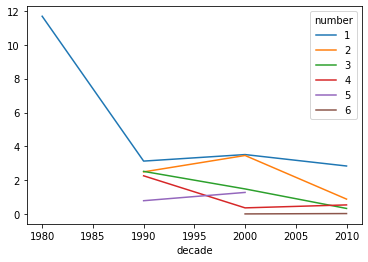

In [65]:
data.pivot_table(values='mass', index='decade',columns='number').plot()
# i don't know what is going on

# String functions

In [66]:
names = pd.Series(['peter', 'Paul', None, 'MARY', 'gUIDO'])

In [67]:
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [68]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

#### list of all available str methods
len() lower () translate() islower() ljust() upper() startswith() isupper() rjust() find() endswith() isnumeric()
center() rfind() isalnum() isdecimal() zfill() index() isalpha() split() strip() rindex() isdigit() rsplit() rstrip()
capitalize() isspace() partition() lstrip() swapcase() istitle() rpartition()

# eval & get_dummies

In [69]:
arr = np.random.randint(10000,size=(1000,1000))

In [70]:
df1 = pd.DataFrame(np.random.randint(10000,size=(1000,1000)))
df2 = pd.DataFrame(np.random.randint(10000,size=(1000,1000)))
df3 = pd.DataFrame(np.random.randint(10000,size=(1000,1000)))

In [71]:
%timeit df1+df2+df3+df1+df2+df3+df1+df2+df3+df1+df2+df3

48.5 ms ± 2.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [72]:
%timeit pd.eval('df1+df2+df3+df1+df2+df3+df1+df2+df3+df1+df2+df3')

25.7 ms ± 4.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [73]:
pd.get_dummies(data)
# 0 is for not and 1 for yes

,number,orbital_period,mass,distance,year,decade,gen_dis,method_Astrometry,method_Eclipse Timing Variations,method_Imaging,method_Microlensing,method_Orbital Brightness Modulation,method_Pulsar Timing,method_Pulsation Timing Variations,method_Radial Velocity,method_Transit,method_Transit Timing Variations
0,1,269.300000,7.10,77.40,2006,2000,1.0,0,0,0,0,0,0,0,1,0,0
1,1,874.774000,2.21,56.95,2008,2000,1.0,0,0,0,0,0,0,0,1,0,0
2,1,763.000000,2.60,19.84,2011,2010,1.0,0,0,0,0,0,0,0,1,0,0
3,1,326.030000,19.40,110.62,2007,2000,1.0,0,0,0,0,0,0,0,1,0,0
4,1,516.220000,10.50,119.47,2009,2000,1.0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1,3.941507,NaN,172.00,2006,2000,1.0,0,0,0,0,0,0,0,0,1,0
1031,1,2.615864,NaN,148.00,2007,2000,1.0,0,0,0,0,0,0,0,0,1,0
1032,1,3.191524,NaN,174.00,2007,2000,1.0,0,0,0,0,0,0,0,0,1,0
1033,1,4.125083,NaN,293.00,2008,2000,1.0,0,0,0,0,0,0,0,0,1,0


In [74]:
pd.get_dummies(data['method'])

,Astrometry,Eclipse Timing Variations,Imaging,Microlensing,Orbital Brightness Modulation,Pulsar Timing,Pulsation Timing Variations,Radial Velocity,Transit,Transit Timing Variations
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1030,0,0,0,0,0,0,0,0,1,0
1031,0,0,0,0,0,0,0,0,1,0
1032,0,0,0,0,0,0,0,0,1,0
1033,0,0,0,0,0,0,0,0,1,0


# Null Values

In [75]:
import seaborn as sns
data2 = sns.load_dataset("planets")
data2 = pd.DataFrame(data2)
data2

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [76]:
data2.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

More about to come....!!!!